# "PDFs in Python"
> "A quick-start guide for working with PyMuPDF"

- toc: true
- branch: master
- badges: true
- comments: true
- author: David Cato
- categories: [jupyter, python, quick-demo]

This notebook primarily intended as a quick reference for working with PDFs in Python, to be expanded over time. The structure and much of the content is based on following this [tutorial](https://pymupdf.readthedocs.io/en/latest/tutorial/) in the PyMuPDF docs.

**PyMuPDF**:
- [GitHub](https://github.com/pymupdf/PyMuPDF)
- [Docs](https://pymupdf.readthedocs.io/en/latest/)
- Recipes:
  - [Docs - Recipes](https://pymupdf.readthedocs.io/en/latest/faq/#faq)
  - [Wiki - Recipes](https://github.com/pymupdf/PyMuPDF/wiki) (e.g. [working with SVGs](https://github.com/pymupdf/PyMuPDF/wiki/Vector-Image-Support), [extract fonts](https://github.com/pymupdf/PyMuPDF/wiki/How-to-Extract-Fonts-from-a-PDF), [extract text from rectangle](https://github.com/pymupdf/PyMuPDF/wiki/How-to-extract-text-from-a-rectangle))
  - [GitHub - Utilities](https://github.com/pymupdf/PyMuPDF-Utilities/tree/master/demo) (e.g. [demo.py](https://github.com/pymupdf/PyMuPDF-Utilities/blob/master/demo/demo.py) - python script similar to this notebook)
- Supported formats:
  - PDF, XPS, OpenXPS, CBZ, CBR, FB2, EPUB

## Installation

[Installing with pip](https://pypi.org/project/PyMuPDF/#files):

In [2]:
 !pip install PyMuPDF

## Import (`fitz`) & Version Info

In [3]:
import fitz

In [4]:
print(fitz.__doc__)


PyMuPDF 1.18.14: Python bindings for the MuPDF 1.18.0 library.
Version date: 2021-06-01 08:11:38.
Built for Python 3.7 on linux (64-bit).



## Working with Documents

### Open Document

First, download a document to work with. Note the use of `joblib` to cache the response, which saves us time on reloading the notebook and also is nice by not hitting the server again):

In [9]:
from joblib import Memory
from pathlib import Path
# !pip install requests
import requests

path = Path('.')
CACHE_DIR =  path / '.jupyter_cache'
memory = Memory(CACHE_DIR, verbose=0)

@memory.cache
def download(url, dst):
    response = requests.get(url, allow_redirects=True)
    with open(dst, 'wb') as f:
        f.write(response.content)

url = 'https://proceedings.neurips.cc/paper/2020/file/00a03ec6533ca7f5c644d198d815329c-Paper.pdf'
fn = path / 'example.pdf'

download(url, fn)

fn

PosixPath('example.pdf')

In [12]:
doc = fitz.open(fn)

### Close Document

In [13]:
# doc.close()

### Read Meta Data

In [14]:
doc.pageCount, doc.metadata, doc.getToC()

(11,
 {'author': '',
  'creationDate': 'D:20201102080135Z',
  'creator': 'LaTeX with hyperref',
  'encryption': None,
  'format': 'PDF 1.5',
  'keywords': '',
  'modDate': 'D:20201102080135Z',
  'producer': 'pdfTeX-1.40.19',
  'subject': '',
  'title': '',
  'trapped': ''},
 [[1, 'Introduction', 1],
  [1, 'Related Work', 2],
  [1, 'Point-wise Dependency Neural Estimation', 2],
  [2, 'Mutual Information and Point-wise Dependency', 3],
  [2, 'Proposed Methods for Point-wise Dependency (PD) Estimation', 4],
  [1, 'Application I: Mutual Information Estimation', 4],
  [1, 'Application II: Self-supervised Representation Learning', 6],
  [1, 'Application III: Cross-modal Learning', 8],
  [1, 'Conclusion', 9]])

## Working with Pages

### Read Pages

In [15]:
# index by page numer
page_no = 0
page = doc[page_no]

page

page 0 of example.pdf

In [16]:
# iterate over pages
for page in doc:
    pass

# slice over pages
for page in doc.pages(2,6):
    pass

# Get Text

In [26]:
!pip install pdfplumber -q
import pdfplumber

     |████████████████████████████████| 51kB 4.7MB/s 
     |████████████████████████████████| 5.6MB 21.6MB/s 
     |████████████████████████████████| 143kB 51.8MB/s 
     |████████████████████████████████| 1.9MB 36.9MB/s 


In [28]:
pdf = pdfplumber.open(fn)
page = pdf.pages[0]

In [30]:
text = page.extract_text()
text

'Neural Methods for Point-wise Dependency Estimation\nYao-HungHubertTsai1,HanZhao2∗,\nMakotoYamada34,Louis-PhilippeMorency1,RuslanSalakhutdinov1\n1CarnegieMellonUniversity,2D.E.Shaw&Co.,3KyotoUniversity,4RIKENAIP\nAbstract\nSinceitsinception,theneuralestimationofmutualinformation(MI)hasdemon-\nstrated the empirical success of modeling expected dependency between high-\ndimensionalrandomvariables. However,MIisanaggregatestatisticandcannot\nbeusedtomeasurepoint-wisedependencybetweendifferentevents. Inthiswork,\ninsteadofestimatingtheexpecteddependency,wefocusonestimatingpoint-wise\ndependency (PD), which quantitatively measures how likely two outcomes co-\noccur. WeshowthatwecannaturallyobtainPDwhenweareoptimizingMIneural\nvariationalbounds. However,optimizingtheseboundsischallengingduetoits\nlargevarianceinpractice. Toaddressthisissue, wedeveloptwomethods(free\nofoptimizingMIvariationalbounds): ProbabilisticClassiﬁerandDensity-Ratio\nFitting.Wedemonstratetheeffectivenessofourapproachesi

In [14]:
!pip install PyPDF2


     |████████████████████████████████| 81kB 5.9MB/s 
  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-cp37-none-any.whl size=61102 sha256=0ea710b0ac384276ac18cbb6faa3ccb3c006afebe4d0fd5ee10b17445f2e4e74
  Stored in directory: /root/.cache/pip/wheels/53/84/19/35bc977c8bf5f0c23a8a011aa958acd4da4bbd7a229315c1b7
Successfully built PyPDF2


In [25]:
import PyPDF2
pdfReader = PyPDF2.PdfFileReader('./example.pdf')
page_one = pdfReader.getPage(0)
text = page_one.extractText()
print(text)

NeuralMethodsforPoint-wiseDependencyEstimation
Yao-HungHubertTsai
1
,HanZhao
2

,
MakotoYamada
34
,Louis-PhilippeMorency
1
,RuslanSalakhutdinov
1
1
CarnegieMellonUniversity,
2
D.E.Shaw&Co.,
3
KyotoUniversity,
4
RIKENAIP
Abstract
Sinceitsinception,theneuralestimationofmutualinformation(MI)hasdemon-
stratedtheempiricalsuccessofmodelingexpecteddependencybetweenhigh-
dimensionalrandomvariables.However,MIisanaggregatestatisticandcannot
beusedtomeasurepoint-wisedependencybetweendifferentevents.Inthiswork,
insteadofestimatingtheexpecteddependency,wefocusonestimatingpoint-wise
dependency(PD),whichquantitativelymeasureshowlikelytwooutcomesco-
occur.WeshowthatwecannaturallyobtainPDwhenweareoptimizingMIneural
variationalbounds.However,optimizingtheseboundsischallengingduetoits
largevarianceinpractice.Toaddressthisissue,wedeveloptwomethods(free
ofoptimizingMIvariationalbounds):ProbabilisticandDensity-Ratio
Fitting.Wedemonstratetheeffectivenessofourapproachesin1)MIestimation,2)
self-supervisedrepre

In [26]:
word1 = 'Abstract'
word2 = 'Introduction'
print(text.index(word1))
print(text.index(word2))

220
1050


In [28]:
abstract_text = text[text.index(word1):text.index(word2)]
print(abstract_text)

Abstract
Sinceitsinception,theneuralestimationofmutualinformation(MI)hasdemon-
stratedtheempiricalsuccessofmodelingexpecteddependencybetweenhigh-
dimensionalrandomvariables.However,MIisanaggregatestatisticandcannot
beusedtomeasurepoint-wisedependencybetweendifferentevents.Inthiswork,
insteadofestimatingtheexpecteddependency,wefocusonestimatingpoint-wise
dependency(PD),whichquantitativelymeasureshowlikelytwooutcomesco-
occur.WeshowthatwecannaturallyobtainPDwhenweareoptimizingMIneural
variationalbounds.However,optimizingtheseboundsischallengingduetoits
largevarianceinpractice.Toaddressthisissue,wedeveloptwomethods(free
ofoptimizingMIvariationalbounds):ProbabilisticandDensity-Ratio
Fitting.Wedemonstratetheeffectivenessofourapproachesin1)MIestimation,2)
self-supervisedrepresentationlearning,and3)cross-modalretrievaltask.
1


In [18]:
pdfReader.documentInfo

{'/Author': '',
 '/CreationDate': 'D:20201102080135Z',
 '/Creator': 'LaTeX with hyperref',
 '/Keywords': '',
 '/ModDate': 'D:20201102080135Z',
 '/PTEX.Fullbanner': 'This is pdfTeX, Version 3.14159265-2.6-1.40.19 (TeX Live 2018) kpathsea version 6.3.0',
 '/Producer': 'pdfTeX-1.40.19',
 '/Subject': '',
 '/Title': '',
 '/Trapped': '/False'}

In [19]:
pdfReader.numPages

11

In [20]:
reader.getPage(0).extractText()

'NeuralMethodsforPoint-wiseDependencyEstimation\nYao-HungHubertTsai\n1\n,HanZhao\n2\n\n,\nMakotoYamada\n34\n,Louis-PhilippeMorency\n1\n,RuslanSalakhutdinov\n1\n1\nCarnegieMellonUniversity,\n2\nD.E.Shaw&Co.,\n3\nKyotoUniversity,\n4\nRIKENAIP\nAbstract\nSinceitsinception,theneuralestimationofmutualinformation(MI)hasdemon-\nstratedtheempiricalsuccessofmodelingexpecteddependencybetweenhigh-\ndimensionalrandomvariables.However,MIisanaggregatestatisticandcannot\nbeusedtomeasurepoint-wisedependencybetweendifferentevents.Inthiswork,\ninsteadofestimatingtheexpecteddependency,wefocusonestimatingpoint-wise\ndependency(PD),whichquantitativelymeasureshowlikelytwooutcomesco-\noccur.WeshowthatwecannaturallyobtainPDwhenweareoptimizingMIneural\nvariationalbounds.However,optimizingtheseboundsischallengingduetoits\nlargevarianceinpractice.Toaddressthisissue,wedeveloptwomethods(free\nofoptimizingMIvariationalbounds):ProbabilisticandDensity-Ratio\nFitting.Wedemonstratetheeffectivenessofourapproachesin1)MIe

# Other

### Inspect a Page

#### links

In [17]:
# all links in one page
links = page.getLinks()

# iterator over links
for link in page.links():
    pass

links

[{'from': Rect(233.74200439453125, 108.23297119140625, 240.71600341796875, 118.76397705078125),
  'id': '',
  'kind': 1,
  'page': 3,
  'to': Point(330.0, 628.0),
  'xref': 133,
  'zoom': 0.0},
 {'from': Rect(277.1199951171875, 205.3740234375, 289.07501220703125, 214.1209716796875),
  'id': '',
  'kind': 1,
  'page': 9,
  'to': Point(108.0, 510.0),
  'xref': 134,
  'zoom': 0.0},
 {'from': Rect(156.72300720214844, 300.2040100097656, 163.63699340820312, 311.1080017089844),
  'id': '',
  'kind': 1,
  'page': 5,
  'to': Point(108.0, 240.0),
  'xref': 135,
  'zoom': 0.0},
 {'from': Rect(447.57000732421875, 300.2040100097656, 454.4840087890625, 311.1080017089844),
  'id': '',
  'kind': 1,
  'page': 5,
  'to': Point(108.0, 266.0),
  'xref': 136,
  'zoom': 0.0},
 {'from': Rect(367.0570068359375, 333.20001220703125, 374.031005859375, 341.77801513671875),
  'id': '',
  'kind': 1,
  'page': 8,
  'to': Point(112.0, 690.0),
  'xref': 137,
  'zoom': 0.0},
 {'from': Rect(224.6020050048828, 454.020996

#### annotations & form fields

In [18]:
# iterate over annotations
for annot in page.annots():
    print(annot)

# iterate over form fields
for field in page.widgets():
    print(field)

### Convert Page to Image

`pix` is a Pixmap object which (in this case) contains an RGB image of the page, ready to be used for many purposes. Method `Page.getPixmap()` offers lots of variations for controlling the image: resolution, colorspace (e.g. to produce a grayscale image or an image with a subtractive color scheme), transparency, rotation, mirroring, shifting, shearing, etc. For example: to create an RGBA image (i.e. containing an alpha channel), specify `pix = page.getPixmap(alpha=True)`.

#### Choose Resolution

In [19]:
# default (poor resolution causes text in example.pdf to be barely readable)
# file size: 120 kB
pix = page.getPixmap()

# 2x default resolution (text is clear, image text still hard to read)
# file size: 328 kB
zoom_xy = (2., 2.)
mat = fitz.Matrix(*zoom_xy)
pix = page.getPixmap(matrix=mat)  # use 'mat' instead of the identity matrix

# 4x default resolution (image text is barely readable)
# file size: 691 kB
zoom_xy = (4., 4.)
mat = fitz.Matrix(*zoom_xy)
pix = page.getPixmap(matrix=mat)  # use 'mat' instead of the identity matrix

# 8x default resolution (image text is pretty clear but still not perfect)
# file size: 1.4 MB
zoom_xy = (8., 8.)
mat = fitz.Matrix(*zoom_xy)
pix = page.getPixmap(matrix=mat)  # use 'mat' instead of the identity matrix

#### Save Page as PNG

In [20]:
dst = fn.parent / f'{fn.stem}_page-{page.number}.png'

dst

PosixPath('example_page-5.png')

In [21]:
pix.writeImage(str(dst))

#### Open page with Pillow

In [22]:
from PIL import Image

mode = "RGBA" if pix.alpha else "RGB"
img = Image.frombytes(mode, [pix.width, pix.height], pix.samples)

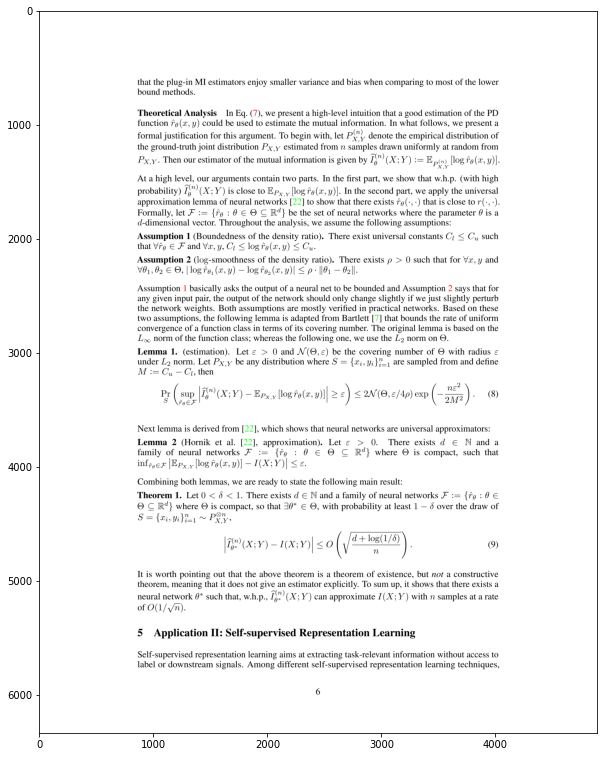

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,20))
plt.imshow(img);

### Extract Text & Images

Use one of the following strings for opt to obtain different formats [2]:

    “text”: (default) plain text with line breaks. No formatting, no text position details, no images.
    “blocks”: generate a list of text blocks (= paragraphs).
    “words”: generate a list of words (strings not containing spaces).
    “html”: creates a full visual version of the page including any images. This can be displayed with your internet browser.
    “dict” / “json”: same information level as HTML, but provided as a Python dictionary or resp. JSON string. See TextPage.extractDICT() resp. TextPage.extractJSON() for details of its structure.
    “rawdict”: a super-set of TextPage.extractDICT(). It additionally provides character detail information like XML. See TextPage.extractRAWDICT() for details of its structure.
    “xhtml”: text information level as the TEXT version but includes images. Can also be displayed by internet browsers.
    “xml”: contains no images, but full position and font information down to each single text character. Use an XML module to interpret.

To get an idea about the output of these alternatives, see [Appendix 2: Details on Text Extraction](https://pymupdf.readthedocs.io/en/latest/app2/#appendix2).

In [24]:
text_options = {
    'text', 'blocks', 'words', 'html', 
    'dict', 'json', 'rawDict', 'xhtml', 'xml'}

opt = 'text'

text = page.getText(opt)

text

'that the plug-in MI estimators enjoy smaller variance and bias when comparing to most of the lower\nbound methods.\nTheoretical Analysis\nIn Eq. (7), we present a high-level intuition that a good estimation of the PD\nfunction ˆrθ(x, y) could be used to estimate the mutual information. In what follows, we present a\nformal justification for this argument. To begin with, let P (n)\nX,Y denote the empirical distribution of\nthe ground-truth joint distribution PX,Y estimated from n samples drawn uniformly at random from\nPX,Y . Then our estimator of the mutual information is given by �I(n)\nθ\n(X; Y ) := EP (n)\nX,Y [log ˆrθ(x, y)].\nAt a high level, our arguments contain two parts. In the first part, we show that w.h.p. (with high\nprobability) �I(n)\nθ\n(X; Y ) is close to EPX,Y [log ˆrθ(x, y)]. In the second part, we apply the universal\napproximation lemma of neural networks [22] to show that there exists ˆrθ(·, ·) that is close to r(·, ·).\nFormally, let F := {ˆrθ : θ ∈ Θ ⊆ Rd} be t

### Search for Text

In [25]:
rectangles = page.searchFor('We', hit_max = 16)

rectangles

[Rect(489.3280944824219, 72.757568359375, 500.8747863769531, 84.76250457763672),
 Rect(247.97279357910156, 106.778564453125, 259.3916931152344, 118.78350067138672),
 Rect(453.12579345703125, 117.68756103515625, 464.9745178222656, 129.69248962402344),
 Rect(377.01153564453125, 178.42755126953125, 388.8602600097656, 190.43247985839844),
 Rect(412.5302734375, 191.986572265625, 424.3789978027344, 203.9915008544922),
 Rect(298.7583312988281, 226.7735595703125, 310.3747253417969, 238.7784881591797),
 Rect(412.84893798828125, 309.6585693359375, 424.325927734375, 321.66351318359375),
 Rect(158.9718475341797, 320.56756591796875, 170.820556640625, 332.572509765625),
 Rect(345.15716552734375, 353.2945556640625, 356.7735595703125, 365.29949951171875),
 Rect(211.51136779785156, 510.695556640625, 223.1277618408203, 522.7005004882812)]

## More Features...

- PDF Maintenance: can only modify in PDF format, first convert to PDF using `doc.convertToPDF()`, after modifying, save to disk with `doc.save()`.
- Join & Split PDF documents
- Modify, Create, Re-arrange & Delete PDF pages
- Embed arbitrary data (similar to ZIP files)